ML Lab8 : Neelmani- 224161019

Question 1.A

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


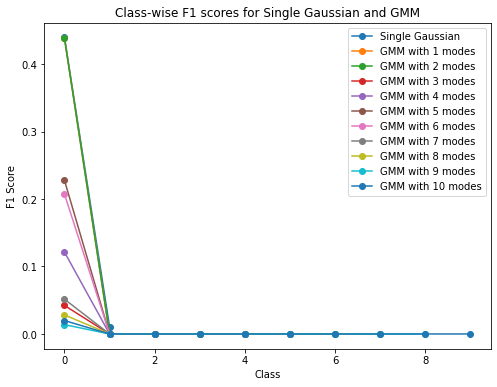

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Load the data
with open('MiniBooNE_PID.txt') as f:
    first_line = f.readline().strip().split()
    n_signal, n_background = int(first_line[0]), int(first_line[1])
    data = np.loadtxt(f)

# Split the data into signal and background events
signal_data = data[:n_signal]
background_data = data[n_signal:]

# Split the data into training and testing sets
signal_train, signal_test = train_test_split(signal_data, test_size=0.2, random_state=42)
background_train, background_test = train_test_split(background_data, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier with Single Gaussian
gnb = GaussianNB()
gnb.fit(np.vstack((signal_train, background_train)), np.concatenate((np.zeros(len(signal_train)), np.ones(len(background_train)))))

# Predict classes for test data
y_pred = gnb.predict(np.vstack((signal_test, background_test)))
y_true = np.concatenate((np.zeros(len(signal_test)), np.ones(len(background_test))))

# Compute F1 score for each class
f1_single_gaussian = f1_score(y_true, y_pred, average=None)

# Train a Naive Bayes Classifier with Gaussian Mixture Model (GMM)
n_components_range = range(1, 11)
f1_scores_gmm = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(np.vstack((signal_train, background_train)))
    y_pred = gmm.predict(np.vstack((signal_test, background_test)))
    f1_scores_gmm.append(f1_score(y_true, y_pred, average=None))

# Plot class-wise F1 scores for Single Gaussian and GMM
plt.figure(figsize=(8, 6))
plt.plot(range(len(f1_single_gaussian)), f1_single_gaussian, 'o-', label='Single Gaussian')
for i, n_components in enumerate(n_components_range):
    plt.plot(range(len(f1_scores_gmm[i])), f1_scores_gmm[i], 'o-', label='GMM with {} modes'.format(n_components))
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('Class-wise F1 scores for Single Gaussian and GMM')
plt.legend()
plt.show()


Question 1.B

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


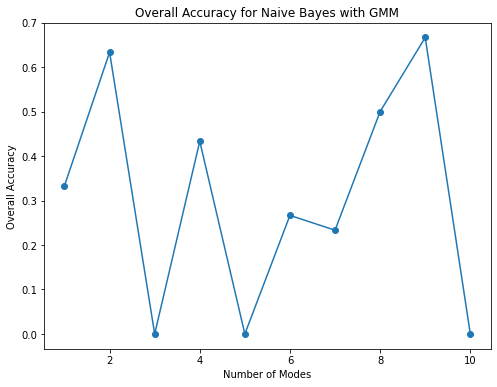

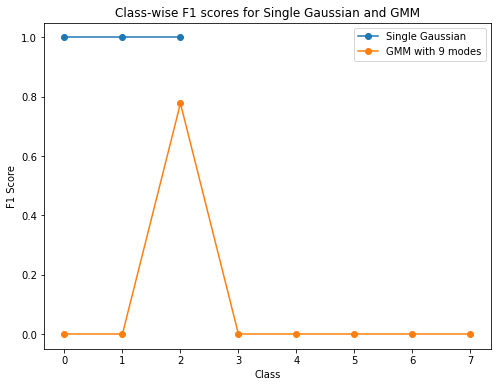

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# Load the data
iris = load_iris()
data = iris.data
labels = iris.target

# Split the data into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a Naive Bayes Classifier with Single Gaussian
gnb = GaussianNB()
gnb.fit(data_train, labels_train)

# Predict classes for test data
y_pred = gnb.predict(data_test)

# Compute F1 score for each class
f1_single_gaussian = f1_score(labels_test, y_pred, average=None)

# Train a Naive Bayes Classifier with Gaussian Mixture Model (GMM)
n_components_range = range(1, 11)
acc_scores_gmm = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(data_train)
    y_pred = gmm.predict(data_test)
    acc_scores_gmm.append(accuracy_score(labels_test, y_pred))

# Plot overall accuracy for GMM with varying number of modes
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, acc_scores_gmm, 'o-')
plt.xlabel('Number of Modes')
plt.ylabel('Overall Accuracy')
plt.title('Overall Accuracy for Naive Bayes with GMM')
plt.show()

# Compute F1 score for each class for GMM with best number of modes
best_n_components = np.argmax(acc_scores_gmm) + 1
gmm = GaussianMixture(n_components=best_n_components)
gmm.fit(data_train)
y_pred = gmm.predict(data_test)
f1_gmm = f1_score(labels_test, y_pred, average=None)

# Plot class-wise F1 scores for Single Gaussian and GMM
plt.figure(figsize=(8, 6))
plt.plot(range(len(f1_single_gaussian)), f1_single_gaussian, 'o-', label='Single Gaussian')
plt.plot(range(len(f1_gmm)), f1_gmm, 'o-', label='GMM with {} modes'.format(best_n_components))
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('Class-wise F1 scores for Single Gaussian and GMM')
plt.legend()
plt.show()


Question 2

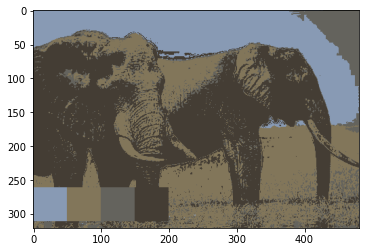

In [15]:
import numpy as np
import cv2
import random

def k_means_clustering(image, K, max_iterations=100):
    # Get image dimensions
    rows, cols, channels = image.shape

    # Initialize cluster centroids randomly
    centroids = np.array([image[random.randint(0, rows - 1), random.randint(0, cols - 1)] for _ in range(K)])

    # Initialize labels and distances
    labels = np.zeros((rows, cols), dtype=np.int32)
    distances = np.zeros((rows, cols, K), dtype=np.float32)

    # Perform K-means iterations
    for iteration in range(max_iterations):
        # Assign labels to each pixel based on the nearest centroid
        for k in range(K):
            distances[:, :, k] = np.linalg.norm(image - centroids[k], axis=2)
        labels = np.argmin(distances, axis=2)

        # Update cluster centroids
        for k in range(K):
            centroids[k] = np.mean(image[labels == k], axis=0)

    # Replace each pixel color with the nearest centroid color
    segmented_image = np.zeros_like(image)
    for k in range(K):
        segmented_image[labels == k] = centroids[k]

    return segmented_image, centroids

# Load the image
image = cv2.imread('KMeans_Seg_Input_Image_1.jpg')

# Apply K-means clustering
K = 4
segmented_image, centroids = k_means_clustering(image, K)

# Save the segmented image and the cluster centroids
cv2.imwrite('segmented_image.png', segmented_image)
for i, centroid in enumerate(centroids):
    centroid_image = np.zeros((50, 50, 3), dtype=np.uint8)
    centroid_image[:, :, :] = centroid.astype(np.uint8)
    x_offset = i * 50
    rows, cols, _ = image.shape
    segmented_image[rows - 60:rows - 10, x_offset:x_offset + 50, :] = centroid_image
cv2.imwrite('cluster_centroids.png', segmented_image)
# Display the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


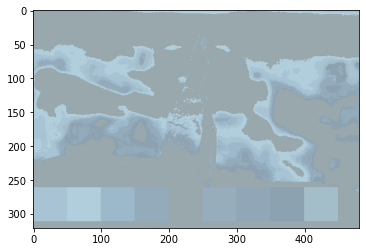

In [16]:
# Load the image
image = cv2.imread('KMeans_Seg_Input_Image_2.jpg')

# Apply K-means clustering
K = 9
segmented_image, centroids = k_means_clustering(image, K)

# Save the segmented image and the cluster centroids
cv2.imwrite('segmented_image_2.png', segmented_image)
for i, centroid in enumerate(centroids):
    centroid_image = np.zeros((50, 50, 3), dtype=np.uint8)
    centroid_image[:, :, :] = centroid.astype(np.uint8)
    x_offset = i * 50
    rows, cols, _ = image.shape
    segmented_image[rows - 60:rows - 10, x_offset:x_offset + 50, :] = centroid_image
cv2.imwrite('cluster_centroids_2.png', segmented_image)
# Display the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()

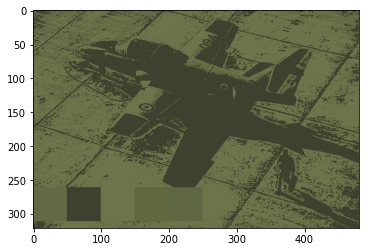

In [22]:
# Load the image
image = cv2.imread('KMeans_Seg_Input_Image_3.jpg')

# Apply K-means clustering
K = 5
segmented_image, centroids = k_means_clustering(image, K)

# Save the segmented image and the cluster centroids
cv2.imwrite('segmented_image_3.png', segmented_image)
for i, centroid in enumerate(centroids):
    centroid_image = np.zeros((50, 50, 3), dtype=np.uint8)
    centroid_image[:, :, :] = centroid.astype(np.uint8)
    x_offset = i * 50
    rows, cols, _ = image.shape
    segmented_image[rows - 60:rows - 10, x_offset:x_offset + 50, :] = centroid_image
cv2.imwrite('cluster_centroids_3.png', segmented_image)
# Display the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()

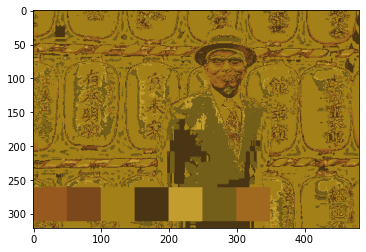

In [23]:
# Load the image
image = cv2.imread('KMeans_Seg_Input_Image_4.jpg')

# Apply K-means clustering
K = 7
segmented_image, centroids = k_means_clustering(image, K)

# Save the segmented image and the cluster centroids
cv2.imwrite('segmented_image_4.png', segmented_image)
for i, centroid in enumerate(centroids):
    centroid_image = np.zeros((50, 50, 3), dtype=np.uint8)
    centroid_image[:, :, :] = centroid.astype(np.uint8)
    x_offset = i * 50
    rows, cols, _ = image.shape
    segmented_image[rows - 60:rows - 10, x_offset:x_offset + 50, :] = centroid_image
cv2.imwrite('cluster_centroids_4.png', segmented_image)
# Display the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()

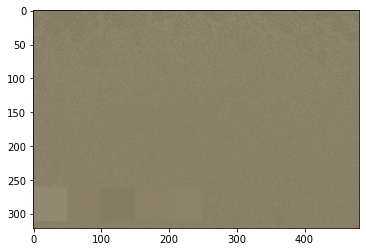

In [28]:
# Load the image
image = cv2.imread('KMeans_Seg_Input_Image_5.jpg')

# Apply K-means clustering
K = 5
segmented_image, centroids = k_means_clustering(image, K)

# Save the segmented image and the cluster centroids
cv2.imwrite('segmented_image_5.png', segmented_image)
for i, centroid in enumerate(centroids):
    centroid_image = np.zeros((50, 50, 3), dtype=np.uint8)
    centroid_image[:, :, :] = centroid.astype(np.uint8)
    x_offset = i * 50
    rows, cols, _ = image.shape
    segmented_image[rows - 60:rows - 10, x_offset:x_offset + 50, :] = centroid_image
cv2.imwrite('cluster_centroids_5.png', segmented_image)
# Display the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()

Question 3(A)

In [25]:
import random
import math

circles = [
    (0, 0, 10), (0, 50, 15), (50, 0, 15), (0, -50, 15),
    (-50, 0, 15), (35, 35, 15), (35, -35, 15), (-35, 35, 15),
    (-35, -35, 15), (0, 100, 20), (100, 0, 20), (0, -100, 20),
    (-100, 0, 20), (70, 70, 20), (70, -70, 20), (-70, 70, 20),
    (-70, -70, 20)
]

def generatePointFromRandomCircle():
    # choose a random circle
    circle = random.choice(circles)
    # generate a random point within the circle
    x, y, r = circle
    angle = random.uniform(0, 2*math.pi)
    radius = r * math.sqrt(random.uniform(0, 1))
    point_x = x + radius * math.cos(angle)
    point_y = y + radius * math.sin(angle)
    print(point_x, point_y)
    return point_x, point_y
    

generatePointFromRandomCircle()


38.89504199219845 30.10601796712404


(38.89504199219845, 30.10601796712404)

Question 3(B)

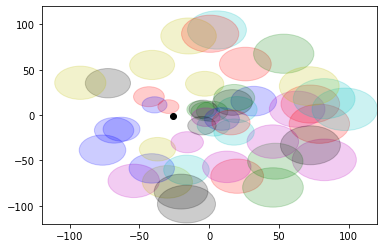

In [21]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


# Constants
N = 17  # number of circles
K = 50  # maximum number of clusters
v_d = 10  # default variance
lamb = 3  # Chebychev inequality threshold


# Function to generate a random point from a circle
def generatePointFromRandomCircle():
    r = random.uniform(0, 100)
    theta = random.uniform(0, 2 * math.pi)
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    return x, y


# Initialize centroids and weights
centroids = [generatePointFromRandomCircle() for _ in range(K)]
weights = [1 / K] * K


# Initialize plot
fig, ax = plt.subplots()


# Loop over iterations
for i in range(5000):
    # Generate a new data point
    x_i = generatePointFromRandomCircle()

    # Find the closest centroid
    distances = [np.linalg.norm(np.array(x_i) - np.array(c)) for c in centroids]
    closest_index = np.argmin(distances)

    # Check if the closest centroid is within the range of the weights list
    if closest_index < len(weights):
        w_i = weights[closest_index]
        v_i = v_d / (w_i + 1)
        mu_i = centroids[closest_index]

        # Convert mu_i to a numpy array for the update
        mu_i = np.array(mu_i)

        # Update the centroid and weight
        centroids[closest_index] = tuple(mu_i + v_i)
        weights[closest_index] += 1

    # If the closest centroid is not within the range of the weights list, append a new weight and centroid
    else:
        centroids.append(x_i)
        weights.append(1)

    # Update the centroid and weight
    centroids[closest_index] = tuple(np.array(mu_i) + v_i)
    weights[closest_index] += 1

    # Check if we have exceeded the maximum number of clusters
    if len(centroids) > K:
        # Remove the centroid with the lowest weight
        min_weight_index = np.argmin(weights)
        centroids.pop(min_weight_index)
        weights.pop(min_weight_index)

    # Plot the clusters every 100 iterations
    if i % 100 == 0:
        ax.clear()
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for j, c in enumerate(centroids):
            # Compute the covariance matrix for the ellipse
            cov = np.eye(2) * v_d
            cov /= lamb ** 2
            cov *= np.max(distances[j])

            # Plot the ellipse
            eigenvalues, eigenvectors = np.linalg.eig(cov)
            angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
            ell = Ellipse(xy=c, width=4 * np.sqrt(eigenvalues[0]), height=4 * np.sqrt(eigenvalues[1]), angle=angle, color=colors[j % len(colors)], alpha=0.2)
            ax.add_artist(ell)

        # Plot the data point
        ax.plot(x_i[0], x_i[1], 'ko')

        # Set the plot limits
        ax.set_xlim(-120, 120)
        ax.set_ylim(-120, 120)

        # Display the plot
        plt.pause(0.01)
